## Neural Networks with Pytorch

Here I build a Neural Network using the nn module

In [1]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [2]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)

# The batch size is the number of images we get in one iteration from the data loader and pass through our network
# shuffle=True tells it to shuffle the dataset every time we start going through the data loader again
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [3]:
# making the training data an iterator
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


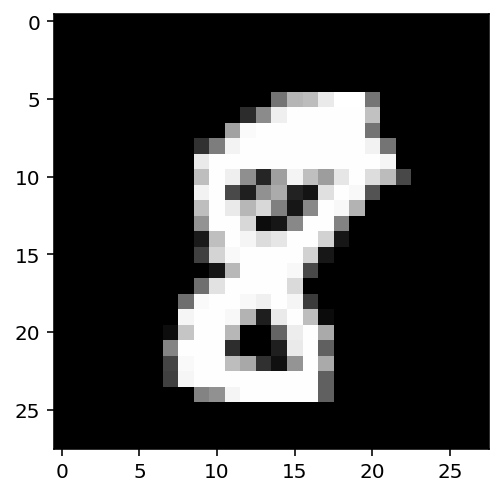

In [5]:
# visualizing a piece of data
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [6]:
## Building a simple network manually with weights and biases
def activation(x):
    return 1/(1+torch.exp(-x))

#Flatten the images
inputs = images.view(images.shape[0], -1)

#Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
print(out)

tensor([[-3.1903e+01, -1.8518e+01,  5.6981e+00, -4.2299e-02,  3.6448e+00,
         -8.4460e-02,  4.6317e+00, -8.0485e+00, -1.0833e+01, -7.3802e+00],
        [-8.8085e+00, -1.8076e+00,  2.0693e-01,  1.7504e+01, -4.8503e-01,
          2.7794e+00, -3.9604e+00,  3.9798e+00, -2.0617e+01, -4.8451e+00],
        [-2.5599e+01, -1.7315e+01,  1.0168e-01,  1.4967e+01,  5.5482e+00,
         -1.2931e+00,  1.2188e+01, -2.0490e+01, -1.6923e+01, -1.5839e+01],
        [-1.8131e+01, -5.7707e+00, -5.0214e-01,  3.1494e+00,  4.7862e+00,
          2.1200e+00,  1.8939e+01, -1.4022e+01, -1.1379e+01,  8.8986e+00],
        [-3.3156e+01, -1.7609e+01,  1.3843e+00,  6.4225e+00,  5.5211e+00,
          9.7100e+00,  1.4248e+01, -1.7917e+01, -9.7221e+00,  1.6346e+00],
        [-3.1980e+01, -7.1626e+00,  1.4174e+00,  6.4397e-01,  5.1943e-01,
          6.4588e+00,  8.1473e+00, -1.2871e+01, -1.0668e+01,  5.6763e+00],
        [-2.4080e+01, -1.4276e+01, -1.4195e-01, -1.4230e+00,  1.0383e+01,
          3.7236e+00,  2.8658e+0

In [7]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)

# Here, out should be the output of the network in the previous excercise with shape (64,10)
probabilities = softmax(out)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building networks with Pytorch nn

In [8]:
from torch import nn

In [9]:
# nn.Module creates a class that defines the architecture of the network
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [10]:
# visualizing the network
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

Create a network with 784 input units, a hidden layer with 128 units and a ReLU activation, then a hidden layer with 64 units and a ReLU activation, and finally an output layer with a softmax activation

In [11]:
## Your solution here
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
    
model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0057,  0.0132, -0.0265,  ...,  0.0110, -0.0329,  0.0297],
        [-0.0201, -0.0183,  0.0007,  ...,  0.0147,  0.0309, -0.0224],
        [ 0.0184, -0.0334,  0.0191,  ...,  0.0052, -0.0336,  0.0168],
        ...,
        [-0.0007,  0.0109,  0.0296,  ...,  0.0287,  0.0027,  0.0109],
        [-0.0326,  0.0008,  0.0070,  ...,  0.0235,  0.0230, -0.0123],
        [ 0.0325,  0.0233,  0.0014,  ...,  0.0356, -0.0268,  0.0114]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0055, -0.0134, -0.0269,  0.0044, -0.0094,  0.0115,  0.0314, -0.0107,
        -0.0148,  0.0101, -0.0066,  0.0056, -0.0299,  0.0297, -0.0174, -0.0050,
         0.0058,  0.0100, -0.0206, -0.0344,  0.0126, -0.0156, -0.0056,  0.0074,
        -0.0122, -0.0204,  0.0305, -0.0051, -0.0331,  0.0310, -0.0347, -0.0112,
         0.0107,  0.0303,  0.0273,  0.0313,  0.0005,  0.0170, -0.0348,  0.0283,
        -0.0324, -0.0294,  0.0251, -0.0116,  0.0323,  0.0284, -0.0137,  0.0291,
        -0.0192

### Forward pass

Passing some data to out network

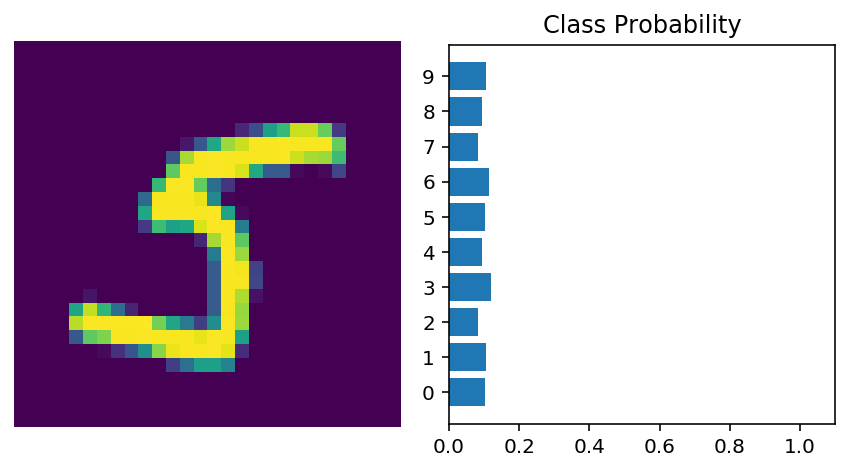

In [13]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

### Using nn.Sequential

Another convenient way of building Networks

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


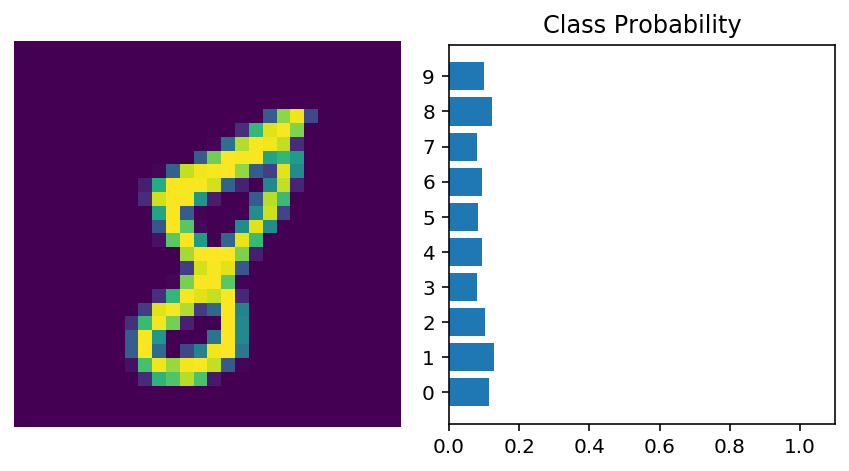

In [14]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [15]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0224, -0.0075,  0.0236,  ...,  0.0028, -0.0048,  0.0200],
        [-0.0179,  0.0301,  0.0271,  ...,  0.0082,  0.0315,  0.0205],
        [-0.0102,  0.0096, -0.0153,  ..., -0.0347,  0.0288,  0.0289],
        ...,
        [ 0.0124,  0.0030, -0.0112,  ...,  0.0056, -0.0277, -0.0187],
        [-0.0282,  0.0246, -0.0214,  ...,  0.0198,  0.0282, -0.0303],
        [-0.0343, -0.0022, -0.0073,  ..., -0.0117,  0.0013, -0.0152]],
       requires_grad=True)